In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift   
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
## 데이터 로드
with open('learners_sub.json', 'r', encoding='utf-8') as f:
    parameters = json.load(f)
print(parameters[0]) ## 잘 되는 지 예시

{'subj': 513, 'q_alpha': 0.0, 'q_beta': 0.9222893612159717, 'vs_alpha_plus': 0.08280517113228125, 'vs_alpha_minus': 0.007854599480392193, 'vs_beta': 0.9356674103272441, 'vs_w': 0.3962968553278764, 'nll_q': 138.62943611158894, 'nll_vs': 123.23413585830716}


In [3]:
def normalize_features(X):
    scaler = StandardScaler()
    X = np.array(X).reshape(-1,1)
    X_scaled = scaler.fit_transform(X)
    return X_scaled

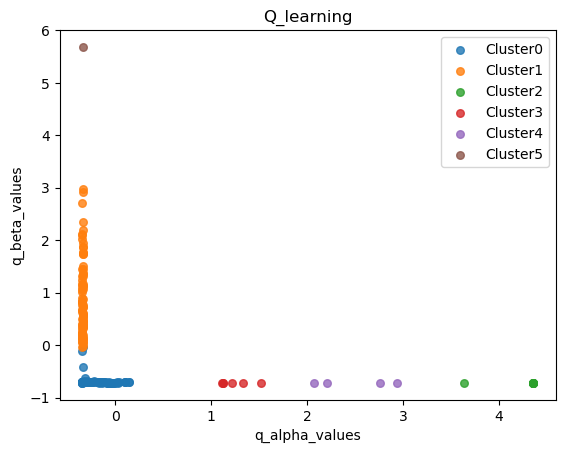

In [4]:
## Clustering using Meanshift()
## Q_learning


ms = MeanShift() # MeanShift 클러스터링 모델 생성
q_alpha_values = normalize_features(np.array([d['q_alpha'] for d in parameters]))#정규화
q_beta_values = normalize_features(np.array([d['q_beta'] for d in parameters]))#정규화
X = np.hstack([q_alpha_values, q_beta_values])#q_alpha와 q_beta 값을 열 방향으로 결합
q_labels =ms.fit_predict(X)#클러스터 예측

unique_labels = np.unique(q_labels)#고유한 클러스터 라벨 추출
for label in unique_labels: ## 각 클러스터에 대해 시각화
    idx = q_labels == label
    plt.scatter(q_alpha_values[idx], q_beta_values[idx], label = f"Cluster{label}", s=30, alpha = 0.8)

plt.title("Q_learning")
plt.xlabel("q_alpha_values")
plt.ylabel("q_beta_values")
plt.legend()
plt.show()

<BarContainer object of 6 artists>

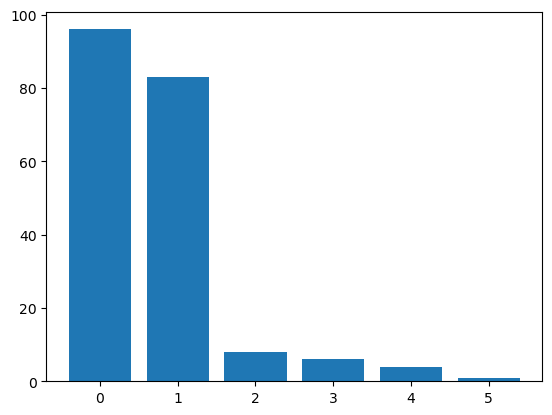

In [5]:
plt.figure()
plt.bar(range(len(np.bincount(q_labels))), np.bincount(q_labels))

In [6]:
import copy 
# 클러스터링 결과 라벨(q_labels)을 각 참가자 데이터에 추가
q_parameters = copy.deepcopy(parameters)
for index, label in enumerate(q_labels):
    q_parameters[index]['labels'] = int(label)  
print(q_parameters[0])

{'subj': 513, 'q_alpha': 0.0, 'q_beta': 0.9222893612159717, 'vs_alpha_plus': 0.08280517113228125, 'vs_alpha_minus': 0.007854599480392193, 'vs_beta': 0.9356674103272441, 'vs_w': 0.3962968553278764, 'nll_q': 138.62943611158894, 'nll_vs': 123.23413585830716, 'labels': 0}


In [7]:
##parameter median 값 구하기
import pandas as pd

df = pd.DataFrame(q_parameters)
medians = df.groupby('labels')[['q_alpha', 'q_beta']].median()
median_dict = medians.to_dict('index')

In [8]:
median_dict

{0: {'q_alpha': 0.008947947703890052, 'q_beta': 1.000193931870165},
 1: {'q_alpha': 8.113523026439117e-05, 'q_beta': 201.2940525099883},
 2: {'q_alpha': 1.0, 'q_beta': 0.03952838785118244},
 3: {'q_alpha': 0.32229985104885983, 'q_beta': 0.14861907478275743},
 4: {'q_alpha': 0.6012285482070175, 'q_beta': 0.06404671730071446},
 5: {'q_alpha': 0.0001561560668769871, 'q_beta': 891.4026888779659}}

In [9]:
import json
import os

# 현재 경로 기준 상위 폴더 경로 구하기
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# 상위 폴더 내 "IGT_postclustering_parameter_applied" 폴더 경로
target_dir = os.path.join(parent_dir, "IGT_postclustering_parameter_applied")

# 폴더가 없으면 생성
os.makedirs(target_dir, exist_ok=True)

# 저장할 파일 경로 설정
file_path = os.path.join(target_dir, "q_label.json")

# JSON 파일로 저장
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(median_dict, f, indent=4)

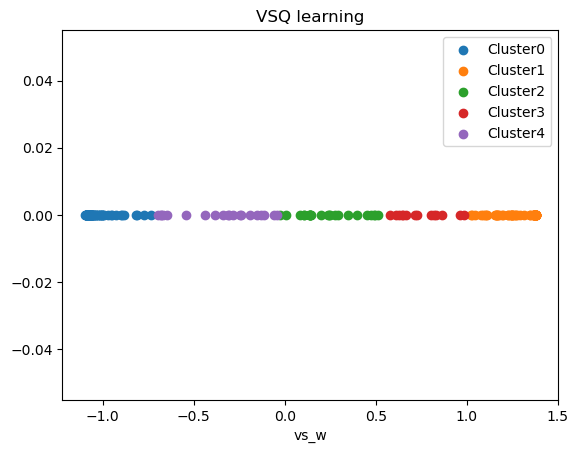

In [10]:
ms = MeanShift() # MeanShift 클러스터링 모델 생성
vs_w = normalize_features(np.array([d['vs_w'] for d in parameters])) # 정규화

vsq_labels =ms.fit_predict(vs_w) #각 데이터 포인트에 대한 클러스터 라벨을 vsq_labels에 저장
y = np.zeros_like(vs_w) #1D 데이터를 2D 평면에 시각화하기 위한 더미 값

unique_labels = np.unique(vsq_labels)#고유 라벨 추출
for label in unique_labels: ## 각 클러스터별로 시각화
    idx = vsq_labels == label
    plt.scatter(vs_w[idx], y[idx], label = f"Cluster{label}")

plt.title("VSQ learning")
plt.xlabel("vs_w")
plt.legend()

plt.show()

<BarContainer object of 5 artists>

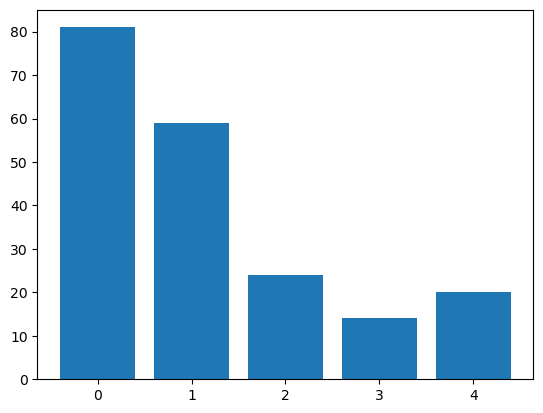

In [11]:
plt.figure()
plt.bar(range(len(np.bincount(vsq_labels))), np.bincount(vsq_labels))

In [12]:
import copy 
# 클러스터링 결과 라벨(vsq_labels)을 각 참가자 데이터에 추가
vsq_parameters = copy.deepcopy(parameters)
for index, label in enumerate(vsq_labels):
    vsq_parameters[index]['labels'] = int(label)  
print(vsq_parameters[0])

{'subj': 513, 'q_alpha': 0.0, 'q_beta': 0.9222893612159717, 'vs_alpha_plus': 0.08280517113228125, 'vs_alpha_minus': 0.007854599480392193, 'vs_beta': 0.9356674103272441, 'vs_w': 0.3962968553278764, 'nll_q': 138.62943611158894, 'nll_vs': 123.23413585830716, 'labels': 4}


In [13]:
df = pd.DataFrame(vsq_parameters)
medians = df.groupby('labels')[['vs_alpha_plus', 'vs_alpha_minus', 'vs_beta', 'vs_w']].median()
median_dict = medians.to_dict('index')
median_dict

{0: {'vs_alpha_plus': 0.03280308919968338,
  'vs_alpha_minus': 0.0001662969672310445,
  'vs_beta': 115.71403625745573,
  'vs_w': 0.010538861232577978},
 1: {'vs_alpha_plus': 0.006313275757886663,
  'vs_alpha_minus': 0.1838745649158682,
  'vs_beta': 6.02028104129905,
  'vs_w': 0.9660615242736125},
 2: {'vs_alpha_plus': 0.017216589453294285,
  'vs_alpha_minus': 0.014627869039784648,
  'vs_beta': 2.0584608708565533,
  'vs_w': 0.5318517133092335},
 3: {'vs_alpha_plus': 0.0461173898495236,
  'vs_alpha_minus': 0.07125621767210487,
  'vs_beta': 1.835651916092588,
  'vs_w': 0.7346340671815117},
 4: {'vs_alpha_plus': 0.005049337192970581,
  'vs_alpha_minus': 0.0006932308063096364,
  'vs_beta': 18.10855384718254,
  'vs_w': 0.31910951036566526}}

In [14]:
import json
import os

# 현재 경로 기준 상위 폴더 경로 구하기
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# 상위 폴더 내 "IGT_postclustering_parameter_applied" 폴더 경로
target_dir = os.path.join(parent_dir, "IGT_postclustering_parameter_applied")

# 폴더가 없으면 생성
os.makedirs(target_dir, exist_ok=True)

# 저장할 파일 경로 설정
file_path = os.path.join(target_dir, "vsq_label.json")

# JSON 파일로 저장
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(median_dict, f, indent=4)